<a href="https://colab.research.google.com/github/dclarke182/Data-Exploration-and-Predictive-Modelling/blob/main/DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Clarke - 18249736 --- *Data Exploration*, *Predictive Modelling*


Martin Vaughan - 16158431 --- *Clustering*, *Predictive Modelling*


Brian Shanahan - 17218829 ---  *Clustering*, *Predictive Modelling*


We worked as a team in person for most project tasks and helped each other evenely on issues. Each member contributed equally wether it be by doing coding, helping with issues or doing research.

#Part 1 - Data Exploration

## Section A - Initial Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
#from scipy import interp
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['parkinson_sample.csv']))
df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,25.647,35.810,0.00340,0.000021,0.00178,0.00162,0.00533,...,0.157,0.00711,0.00765,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774
1,1,72,0,75.657,39.340,0.00285,0.000013,0.00109,0.00136,0.00327,...,0.089,0.00456,0.00584,0.00937,0.01367,0.004981,27.984,0.35842,0.52350,0.17555
2,1,72,0,68.688,38.849,0.00340,0.000017,0.00161,0.00174,0.00482,...,0.316,0.02120,0.02195,0.03069,0.06360,0.005567,25.399,0.45462,0.56983,0.16291
3,1,72,0,61.669,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
4,1,72,0,89.637,40.412,0.00290,0.000014,0.00124,0.00142,0.00371,...,0.173,0.00862,0.01156,0.01737,0.02585,0.005320,27.200,0.44967,0.54700,0.18939


In [ ]:
df.tail()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
2095,42,61,0,65.7570,34.657,0.00306,0.000025,0.00140,0.00167,0.00421,...,0.167,0.00805,0.00885,0.01335,0.02416,0.019214,24.689,0.55307,0.57152,0.11229
2096,42,61,0,106.7600,36.029,0.00249,0.000019,0.00124,0.00123,0.00373,...,0.130,0.00775,0.00868,0.01144,0.02326,0.011046,24.737,0.52205,0.57030,0.11601
2097,42,61,0,-4.2597,28.634,0.00352,0.000027,0.00125,0.00169,0.00376,...,0.159,0.00739,0.00914,0.01465,0.02216,0.009635,24.315,0.58904,0.57961,0.16296
2098,42,61,0,115.6500,35.402,0.00769,0.000066,0.00407,0.00425,0.01222,...,0.162,0.00789,0.00892,0.01439,0.02367,0.062794,23.240,0.54095,0.59527,0.15142
2099,42,61,0,156.8200,32.495,0.00387,0.000032,0.00186,0.00213,0.00557,...,0.221,0.01345,0.01573,0.02115,0.04035,0.008337,23.411,0.44308,0.64552,0.17985


Check for missing Values

In [ ]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

We will now drop columns which we dont think useful to declutter

In [ ]:

df.drop('sex', axis=1, inplace=True)
df.drop('Jitter(Abs)', axis=1, inplace=True)
df.drop('Jitter:RAP', axis=1, inplace=True)
df.drop('Jitter:PPQ5', axis=1, inplace=True)
df.drop('Jitter:DDP', axis=1, inplace=True)
df.drop('Shimmer:APQ3', axis=1, inplace=True)
df.drop('Shimmer:APQ5', axis=1, inplace=True)
df.drop('Shimmer:APQ11', axis=1, inplace=True)
df.drop('Shimmer:DDA', axis=1, inplace=True)

df.tail()

,subject#,age,test_time,total_UPDRS,Jitter(%),Shimmer,Shimmer(dB),NHR,HNR,RPDE,DFA,PPE
2095,42,61,65.7570,34.657,0.00306,0.01811,0.167,0.019214,24.689,0.55307,0.57152,0.11229
2096,42,61,106.7600,36.029,0.00249,0.01460,0.130,0.011046,24.737,0.52205,0.57030,0.11601
2097,42,61,-4.2597,28.634,0.00352,0.01708,0.159,0.009635,24.315,0.58904,0.57961,0.16296
2098,42,61,115.6500,35.402,0.00769,0.01657,0.162,0.062794,23.240,0.54095,0.59527,0.15142
2099,42,61,156.8200,32.495,0.00387,0.02603,0.221,0.008337,23.411,0.44308,0.64552,0.17985


The Subjects tests to not appear to be in order. To fix this we will sort by subject number and then finally test time as this will show us the tests in order conducted, as can be seen in the description:

 ***test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.***

 We then store this and call it 'sorted'



In [ ]:
sorted = df.sort_values(by=['subject#', 'test_time'])

## Section B - Graph Exploration

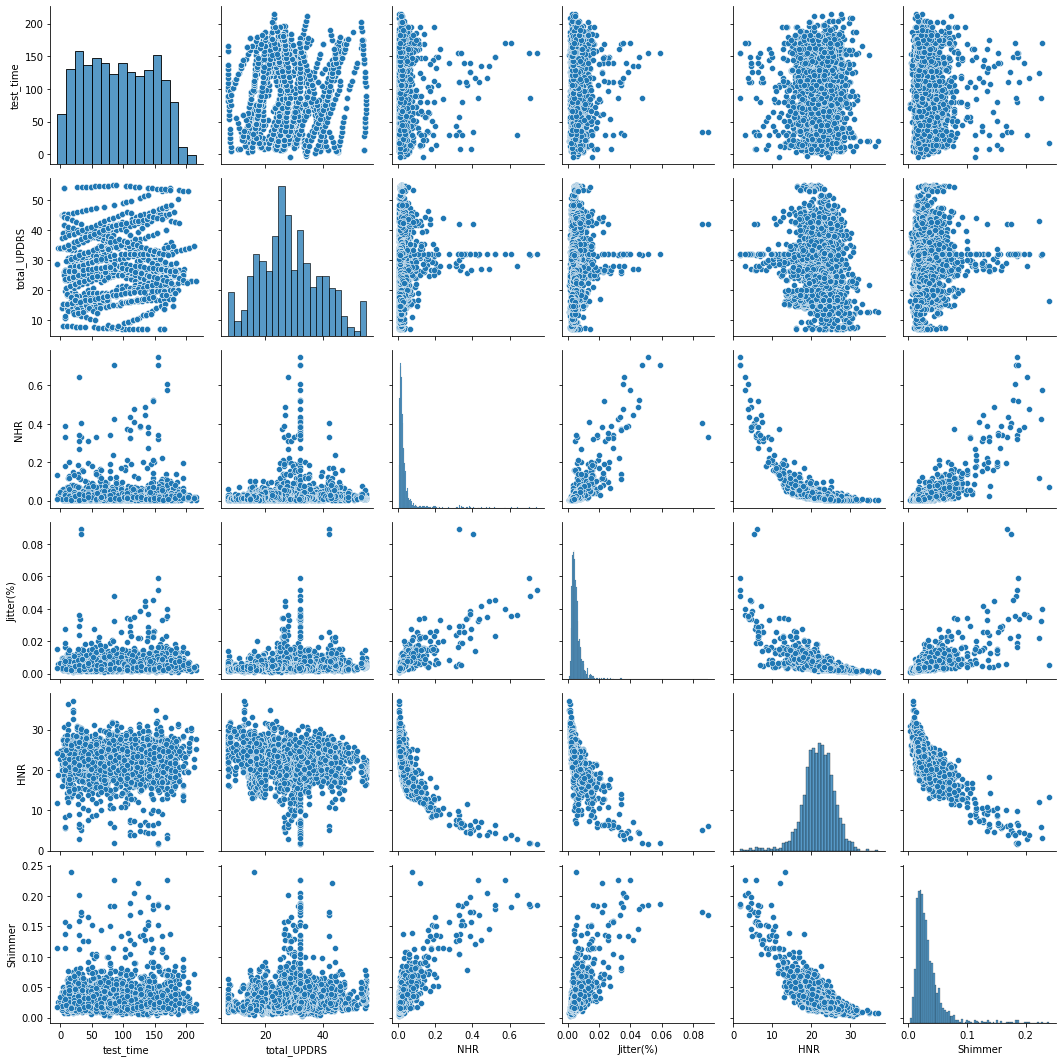

In [ ]:
sns.pairplot(data=sorted[['test_time','total_UPDRS','NHR', 'Jitter(%)', 'HNR', 'Shimmer']].dropna())
plt.show()

From the graphs we can see there appears to be a correlation between a lot of our data, such as NHR, Jitter(%), HNR, total_UPDRS and age. We will try to explore this further and see how it relates

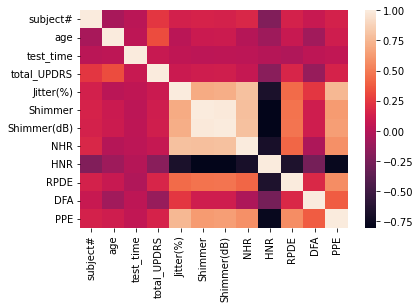

In [ ]:
sns.heatmap(sorted.corr());

Lets take a look at an individual subject to declutter the graphs.

### First Example

In [ ]:
subject1 = df.loc[df['subject#'] == 1]
subject1sort = subject1.sort_values(by=['test_time'])
subject1sort.head()

,subject#,age,test_time,total_UPDRS,Jitter(%),Shimmer,Shimmer(dB),NHR,HNR,RPDE,DFA,PPE
36,1,72,5.6431,34.398,0.00662,0.02565,0.230,0.014290,21.640,0.41888,0.54842,0.160060
21,1,72,5.6431,34.398,0.00348,0.01192,0.113,0.009238,27.927,0.37340,0.52499,0.170660
23,1,72,5.6438,34.398,0.00413,0.01282,0.125,0.030790,26.641,0.50911,0.53637,0.251830
14,1,72,5.6451,34.398,0.00217,0.00798,0.072,0.004547,30.749,0.41216,0.54572,0.094704
25,1,72,12.6660,34.894,0.00300,0.02024,0.179,0.011112,27.183,0.43493,0.56477,0.108100


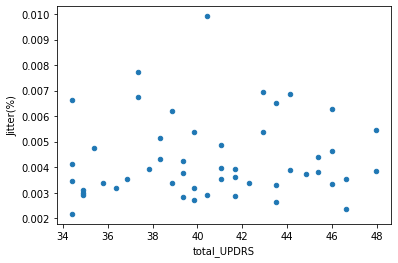

In [ ]:
subject1sort.plot.scatter(x='total_UPDRS', y='Jitter(%)')
plt.show()

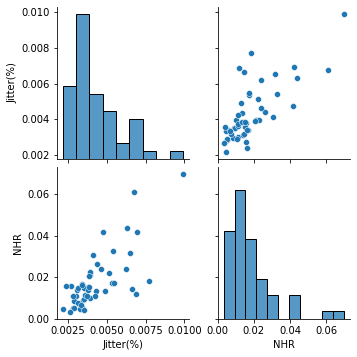

In [ ]:
sns.pairplot(data=subject1sort[['Jitter(%)','NHR']].dropna())
plt.show()

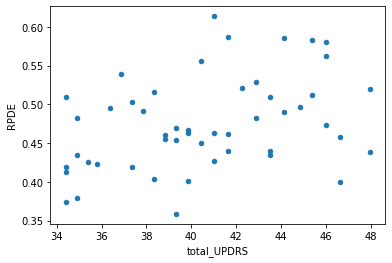

In [ ]:
subject1sort.plot.scatter(x='total_UPDRS', y='RPDE')
plt.show()

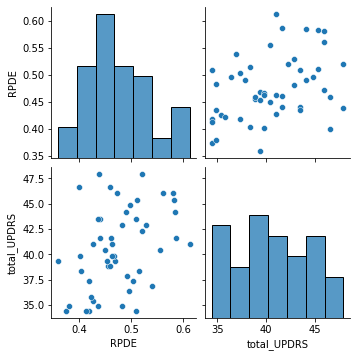

In [ ]:
sns.pairplot(data=subject1sort[['RPDE','total_UPDRS']].dropna())
plt.show()

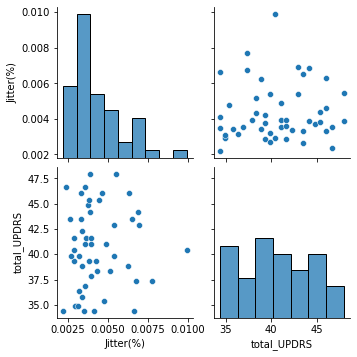

In [ ]:
sns.pairplot(data=subject1sort[['Jitter(%)','total_UPDRS']].dropna())
plt.show()

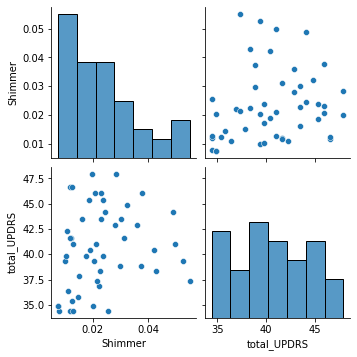

In [ ]:
sns.pairplot(data=subject1sort[['Shimmer','total_UPDRS']].dropna())
plt.show()

### Second Example

In [ ]:
subject4 = df.loc[df['subject#'] == 4]
subject4sort = subject4.sort_values(by=['test_time'])
subject4sort.head()

,subject#,age,test_time,total_UPDRS,Jitter(%),Shimmer,Shimmer(dB),NHR,HNR,RPDE,DFA,PPE
164,4,74,9.6889,15.264,0.00310,0.02696,0.246,0.018408,21.037,0.70068,0.58602,0.16120
167,4,74,16.6930,16.177,0.00537,0.23915,1.970,0.071930,13.308,0.66163,0.64624,0.15161
177,4,74,16.6940,16.177,0.00323,0.06023,0.550,0.078805,13.555,0.67414,0.65258,0.18711
193,4,74,16.6950,16.178,0.00426,0.04051,0.409,0.038864,18.816,0.65992,0.65414,0.22814
152,4,74,30.7240,18.008,0.00301,0.03260,0.284,0.013890,20.802,0.62754,0.61237,0.14295


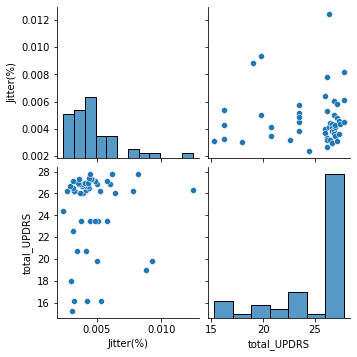

In [ ]:
sns.pairplot(data=subject4sort[['Jitter(%)','total_UPDRS']].dropna())
plt.show()

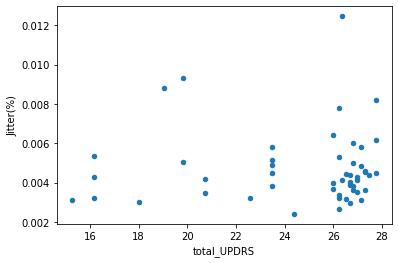

In [ ]:
subject4sort.plot.scatter(x='total_UPDRS', y='Jitter(%)')
plt.show()

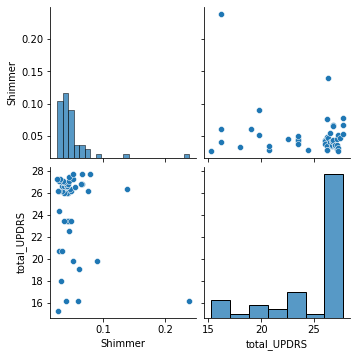

In [ ]:
sns.pairplot(data=subject4sort[['Shimmer','total_UPDRS']].dropna())
plt.show()

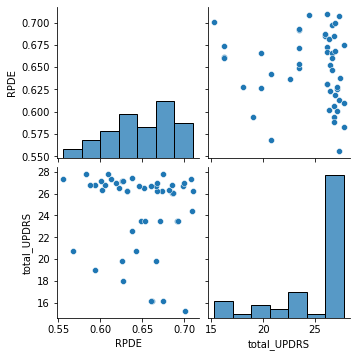

In [ ]:
sns.pairplot(data=subject4sort[['RPDE','total_UPDRS']].dropna())
plt.show()

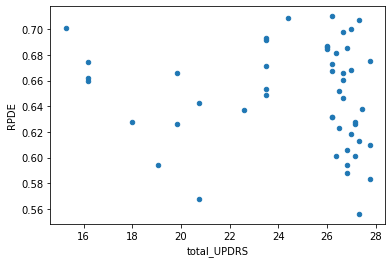

In [ ]:
subject4sort.plot.scatter(x='total_UPDRS', y='RPDE')
plt.show()

## Section C - Conclusion of Explored Data


Looking at our data it seems we have a correlation between test_time, total_UPDRS, Jitter(%), Shimmer and HNR.

The first obvious correlation is the fact that test_time and total_UDPRS are linearly connected. As time goes on, their state worsens and therefore their UDPRS score gets worse too.

If we also take a look at Jitter(%) and NHR we can also see a pattern emerging. We can see that as Jitter increases, so does the NHR score. This shows that there is also a direct correlation between these two data sets.

We can also see that as our NHR score increases, our HNR score decreases exponentially.  This also can show a correlation between these data sets.

NHR are also similarly linked, with a cluster of Shimmer data sets rising as the NHR score also similarly rises.

If we look at the UPDRS score and the Jitter score, we can see some outliers at the top of the scatter plot. Alongside this, we can see a larger cluster in one area at the end of the UPDRS line, but also towards the beginning we seem to have slightly lower Jitter scores. This points to a potential correlation, but may be very small or skewed slightly.

We can see this pattern again when we look at the UPDRS score and Shimmer graphs. We have some outliers again while also having a cluster towards the end of the scale. Again, towards the start of the graph we have smaller clusters with seemingly slightly smaller scores. Similarly to Jitter, this could potentially indicate a very slight correlation.

If we next look at UPDRS and RPDE, we can see a pattern emerging of our cluster rising along with the UPDRS score rising. While they are spread out and scattered, there is still a pattern forming which can be seen in the scatter plot. This would suggest a potentially good data set to explore as it gives a more clear and obvious pattern compared to Jitter and Shimmer.




